## Questão 1
Obtenha os seguintes dados no IPEADATA http://www.ipeadata.gov.br/Default.aspx:

• PIB - preços de mercado - índice real encadeado dessazonalizado (média 1995 = 100).
• Consumo final - famílias - índice real encadeado dessazonalizado (média 1995 = 100).
• Formação bruta de capital fixo - índice real encadeado dessazonalizado (média 1995 =
100).
• PIB - consumo final - APU - índice real encadeado dessazonalizado (média 1995 =
100). Esta é a série de gastos do governo.
• Indicadores Industriais - horas trabalhadas - indústria - índice dessazonalizado (média
2006 = 100).

Você precisa transformar essa série para a frequência trimestral, para isso
tire a média simples entre os meses que compõem o trimestre. Trimestre 1 = média
dos meses de janeiro, fevereiro e março, Trimestre 2=abril,.. etc.


### Tratamento e limpeza dos dados coletados

In [96]:
# Bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter


In [97]:
pib = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\PIB - PREÇOS DE MERCADO.csv")
consumo_familiar = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\PIB - CONSUMO FINAL FAMILIAS.csv")
formacao_capital = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\FORMAÇÃO BRUTA DE CAPITAL FIXO.csv")
gastos_governo = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\PIB - GASTOS DO GOVERNO.csv")
horas_trabalhadas = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\HORAS TRABALHADAS - INDÚSTRIA.csv")


<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<>:5: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<>:5: SyntaxWarning: invalid escape sequence '\{'
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_4188\2052354434.py:1: SyntaxWarning: invalid escape sequence '\{'
  pib = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\PIB - PREÇOS DE MERCADO.csv")
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_4188\2052354434.py:2: SyntaxWarning: invalid escape sequence '\{'
  consumo_familiar = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\PIB - CONSUMO FINAL FAMILIAS.cs

In [98]:
# Removendo colunas e linhas vazias
for df in [pib, consumo_familiar, formacao_capital, gastos_governo, horas_trabalhadas]:
    df.drop(columns=[col for col in df.columns if "Unnamed" in col], inplace=True, errors='ignore')

In [99]:
for df in [pib, consumo_familiar, formacao_capital, gastos_governo]:
    df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
    df.dropna(subset=['Data'], inplace=True) 
    df.drop_duplicates(subset=['Data'], inplace=True)

# Juntando os dados no mesmo data frame pela data
df_temp = pd.merge(pib, consumo_familiar, on='Data', how='inner')
df_temp = pd.merge(df_temp, formacao_capital, on='Data', how='inner')
df = pd.merge(df_temp, gastos_governo, on='Data', how='inner')

df.info()

C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_4188\2199213707.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_4188\2199213707.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_4188\2199213707.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykern

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column                                                                                                                                                                                                                                      Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                      --------------  -----         
 0   Data                                                                                                                                                                                                                                        115 non-null    datetime64[ns]
 1   PIB - preços de mercado - índice real encadeado dessazonalizado (média 1995

In [100]:
# Renomeando as colunas para facilitar a manipulação
df.columns = ['Data',
             'PIB_Mercado',
             'PIB_familias',
             'PIB_capital_fixo',
             'PIB_gastos_gov']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              115 non-null    datetime64[ns]
 1   PIB_Mercado       115 non-null    float64       
 2   PIB_familias      115 non-null    float64       
 3   PIB_capital_fixo  115 non-null    float64       
 4   PIB_gastos_gov    115 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.6 KB


In [101]:
df['Data'] = pd.to_datetime(df['Data'])
df['Trimestre-Ano'] = df['Data'].dt.strftime('T%m %Y')

df.head(12)


,Data,PIB_Mercado,PIB_familias,PIB_capital_fixo,PIB_gastos_gov,Trimestre-Ano
0,1996-01-01,99.395877,98.630029,96.839932,35666.080219,T01 1996
1,1996-02-01,100.661918,100.877926,98.714318,39022.695113,T02 1996
2,1996-03-01,104.149975,103.932393,102.410768,41810.459717,T03 1996
3,1996-04-01,103.377928,109.173637,106.776219,52323.642223,T04 1996
4,1997-01-01,104.422303,106.420582,107.685131,42139.016772,T01 1997
5,1997-02-01,105.000490,106.923325,109.199738,45484.648067,T02 1997
6,1997-03-01,106.132213,106.086136,111.337521,45829.943773,T03 1997
7,1997-04-01,107.220460,106.047612,110.610853,52539.822615,T04 1997
8,1998-01-01,105.101238,105.904056,111.211788,46994.030117,T01 1998
9,1998-02-01,106.813473,105.742701,111.619699,49306.681276,T02 1998


In [102]:
horas_trabalhadas.columns = ['Data', 'Horas_trabalhadas_industria']

## corrigir data outubro em horas_trabalhadas

In [103]:
def converter_data(value):
    try:
        value_str = str(value).strip()
        if '.' in value_str:
            ano, mes = map(int, value_str.split('.'))
            return pd.Timestamp(year=ano, month=mes, day=1)
        else:
            return pd.NaT
    except ValueError:
        return pd.NaT 

horas_trabalhadas['Data'] = horas_trabalhadas['Data'].apply(converter_data)

def determinar_trimestre(mes):
    if mes in [1, 2, 3]:
        return 'T01'
    elif mes in [4, 5, 6]:
        return 'T02'
    elif mes in [7, 8, 9]:
        return 'T03'
    elif mes in [10, 11, 12]:
        return 'T04'

horas_trabalhadas['Trimestre'] = horas_trabalhadas['Data'].dt.month.apply(determinar_trimestre)
horas_trabalhadas['Trimestre-Ano'] = horas_trabalhadas['Trimestre'] + ' ' + horas_trabalhadas['Data'].dt.year.astype(str)

print(horas_trabalhadas.head(12))
print("Valores NaT encontrados:", horas_trabalhadas['Data'].isna().sum())

         Data  Horas_trabalhadas_industria Trimestre Trimestre-Ano
0  1992-01-01                   124.381784       T01      T01 1992
1  1992-02-01                   126.063564       T01      T01 1992
2  1992-03-01                   120.141113       T01      T01 1992
3  1992-04-01                   121.913029       T02      T02 1992
4  1992-05-01                   121.295059       T02      T02 1992
5  1992-06-01                   120.910142       T02      T02 1992
6  1992-07-01                   121.863124       T03      T03 1992
7  1992-08-01                   120.250083       T03      T03 1992
8  1992-09-01                   120.253049       T03      T03 1992
9  1992-01-01                   119.762880       T01      T01 1992
10 1992-11-01                   119.794994       T04      T04 1992
11 1992-12-01                   115.575960       T04      T04 1992
Valores NaT encontrados: 0


In [105]:
# Media das horas trabalhadas
media_trimestral = horas_trabalhadas.groupby('Trimestre-Ano', as_index=False).agg({
    'Horas_trabalhadas_industria': 'mean'
})

# Ordenação do Trimestre-Ano está em ordem alfabética, deve-se reordenar
media_trimestral['Ano'] = media_trimestral['Trimestre-Ano'].str.split().str[1].astype(int)
media_trimestral['Trimestre_Numérico'] = media_trimestral['Trimestre-Ano'].str.split().str[0].str[-2:].astype(int)

# Ordenar com base no ano e no trimestre
media_trimestral = media_trimestral.sort_values(by=['Ano', 'Trimestre_Numérico']).drop(columns=['Ano', 'Trimestre_Numérico'])
media_trimestral.reset_index(drop=True, inplace=True)
media_trimestral.columns = ['Trimestre-Ano', 'horas_trabalhadas']

print(media_trimestral.head(12))

   Trimestre-Ano  horas_trabalhadas
0       T01 1992         122.587335
1       T02 1992         121.372743
2       T03 1992         120.788752
3       T04 1992         117.685477
4       T01 1993         118.832344
5       T02 1993         119.670877
6       T03 1993         119.856767
7       T04 1993         117.843049
8       T01 1994         118.990502
9       T02 1994         118.150705
10      T03 1994         117.681663
11      T04 1994         124.417889


Siga os seguintes passos:

i - Aplique o **logaritmo natural** nas séries. Feito isso, use o filtro HP (Hodrick–Prescott)1 nas
séries em logaritmo e obtenha a tendência de cada série. Faça um gráfico para cada
série junto com sua tendência estimada pelo filtro HP.

In [106]:
# Aplicar o logaritmo natural
df['PIB_Mercado_log'] = np.log(df['PIB_Mercado'])
df['PIB_familias_log'] = np.log(df['PIB_familias'])
df['PIB_capital_fixo_log'] = np.log(df['PIB_capital_fixo'])
df['PIB_gastos_gov_log'] = np.log(df['PIB_gastos_gov'])
media_trimestral['horas_trabalhadas_log'] = np.log(media_trimestral['horas_trabalhadas'])

print(df.head())


        Data  PIB_Mercado  PIB_familias  PIB_capital_fixo  PIB_gastos_gov  \
0 1996-01-01    99.395877     98.630029         96.839932    35666.080219   
1 1996-02-01   100.661918    100.877926         98.714318    39022.695113   
2 1996-03-01   104.149975    103.932393        102.410768    41810.459717   
3 1996-04-01   103.377928    109.173637        106.776219    52323.642223   
4 1997-01-01   104.422303    106.420582        107.685131    42139.016772   

  Trimestre-Ano  PIB_Mercado_log  PIB_familias_log  PIB_capital_fixo_log  \
0      T01 1996         4.599111          4.591376              4.573059   
1      T02 1996         4.611768          4.613911              4.592230   
2      T03 1996         4.645832          4.643741              4.628992   
3      T04 1996         4.638391          4.692940              4.670735   
4      T01 1997         4.648443          4.667399              4.679212   

   PIB_gastos_gov_log  
0           10.481955  
1           10.571899  
2       

In [107]:
# O filtro HP é usado para decompor a série em tendência e componente cíclico
def aplicar_filtro_hp(serie):
    ciclo, tendencia = hpfilter(serie, lamb=1600) # lambda=1600 é padrão para dados trimestrais
    return ciclo, tendencia

df['PIB_Mercado_ciclo'], df['PIB_Mercado_tendencia'] = aplicar_filtro_hp(df['PIB_Mercado_log'])
df['PIB_familias_ciclo'], df['PIB_familias_tendencia'] = aplicar_filtro_hp(df['PIB_familias_log'])
df['PIB_capital_fixo_ciclo'], df['PIB_capital_fixo_tendencia'] = aplicar_filtro_hp(df['PIB_capital_fixo_log'])
df['PIB_gastos_gov_ciclo'], df['PIB_gastos_gov_tendencia'] = aplicar_filtro_hp(df['PIB_gastos_gov_log'])
media_trimestral['horas_trabalhadas_ciclo'], media_trimestral['horas_trabalhadas_tendencia'] = aplicar_filtro_hp(media_trimestral['horas_trabalhadas_log'])


In [108]:
def plot_tendencia(data, original, tendencia, titulo):
    plt.figure(figsize=(12, 8))
    
    # Série original e tendência
    plt.subplot(2, 1, 1)
    plt.plot(data, original, label='Logaritmo da série original', color='blue')
    plt.plot(data, tendencia, label='Tendência (Filtro HP)', color='red')
    plt.title(f'Tendência da Série - {titulo}',  fontdict={'family':'serif','color':'midnightblue','size':20})
    plt.xlabel('Trimestre', fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.xticks(range(0, len(data), 4), data[::4], rotation=45)
    plt.ylabel('Logaritmo Natural', fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.grid(True, linestyle='-', alpha=0.3)
    plt.legend()
    plt.show()

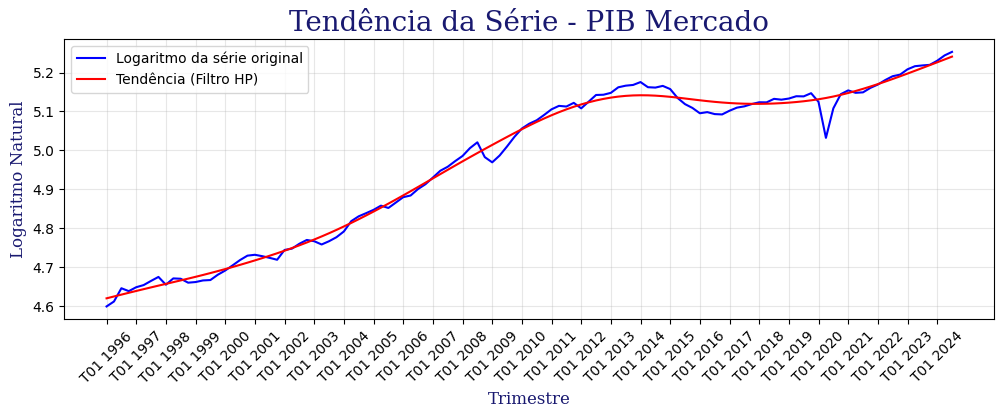

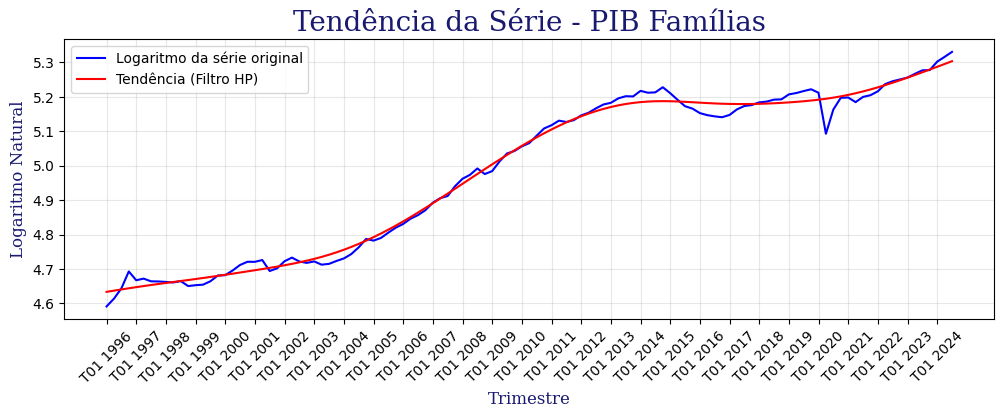

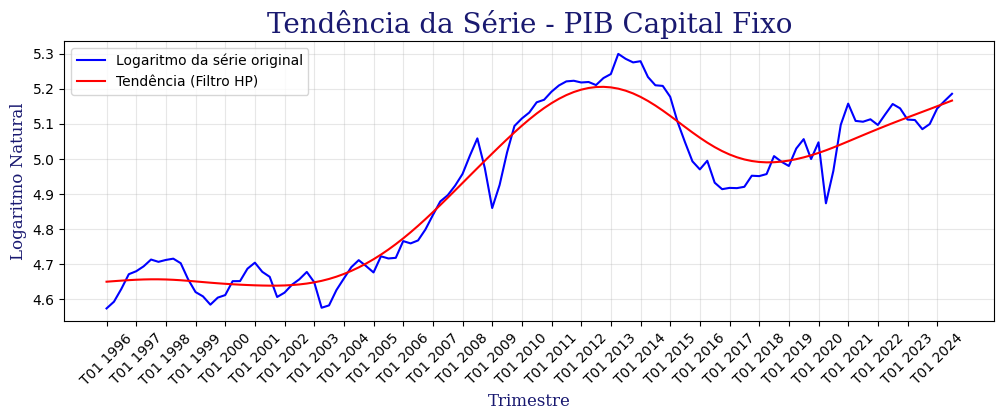

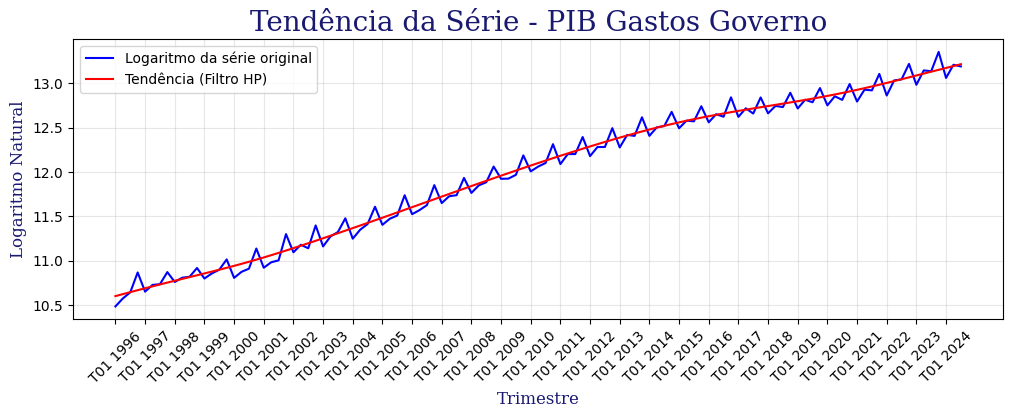

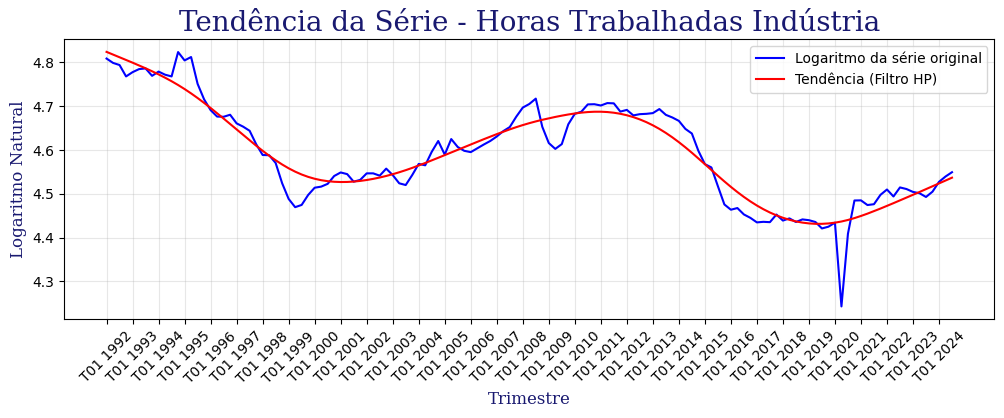

In [109]:
# Gráfico para cada série junto com sua tendência estimada pelo filtro HP
plot_tendencia(df['Trimestre-Ano'], df['PIB_Mercado_log'], df['PIB_Mercado_tendencia'], 'PIB Mercado')
plot_tendencia(df['Trimestre-Ano'], df['PIB_familias_log'], df['PIB_familias_tendencia'], 'PIB Famílias')
plot_tendencia(df['Trimestre-Ano'], df['PIB_capital_fixo_log'], df['PIB_capital_fixo_tendencia'], 'PIB Capital Fixo')
plot_tendencia(df['Trimestre-Ano'], df['PIB_gastos_gov_log'], df['PIB_gastos_gov_tendencia'], 'PIB Gastos Governo')
plot_tendencia(media_trimestral['Trimestre-Ano'], media_trimestral['horas_trabalhadas_log'], media_trimestral['horas_trabalhadas_tendencia'], 'Horas Trabalhadas Indústria')

ii Obtenha o componente cíclico de cada série. Faça um gráfico para cada componente cíclico de cada série. Identifique episódios históricos associando-os aos resultados encontrados.


In [110]:
def graficos(data, original, tendencia, ciclo, titulo):
    plt.figure(figsize=(12, 8))
    
    # Série original e tendência
    plt.subplot(2, 1, 1)
    plt.plot(data, original, label='Original', color='blue')
    plt.plot(data, tendencia, label='Tendência (Filtro HP)', color='red')
    plt.title(f'Tendência da Série - {titulo}',  fontdict={'family':'serif','color':'midnightblue','size':20})
    plt.xlabel('Trimestre', fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.xticks(range(0, len(data), 4), data[::4], rotation=45)
    plt.grid(True, linestyle='-', alpha=0.3)
    plt.legend()
    
    # Componente cíclico
    plt.subplot(2, 1, 2)
    plt.plot(data, ciclo, label='Componente Cíclico', color='green')
    plt.axhline(0, color='black', linestyle='--', alpha=0.6)
    plt.title(f'Componente Cíclico - {titulo}', fontdict={'family':'serif','color':'midnightblue','size':20})
    plt.legend()
    plt.xlabel('Trimestre', fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.xticks(range(0, len(data), 4), data[::4], rotation=45)
    plt.grid(True, linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

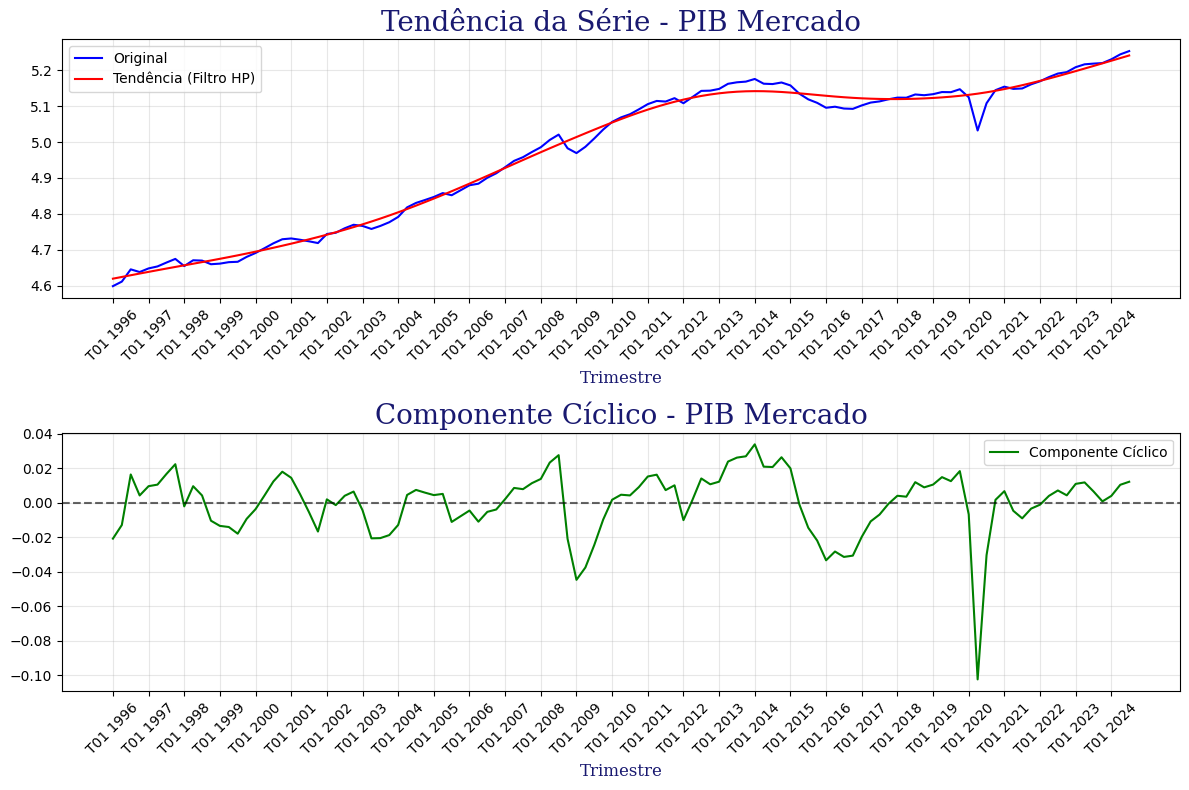

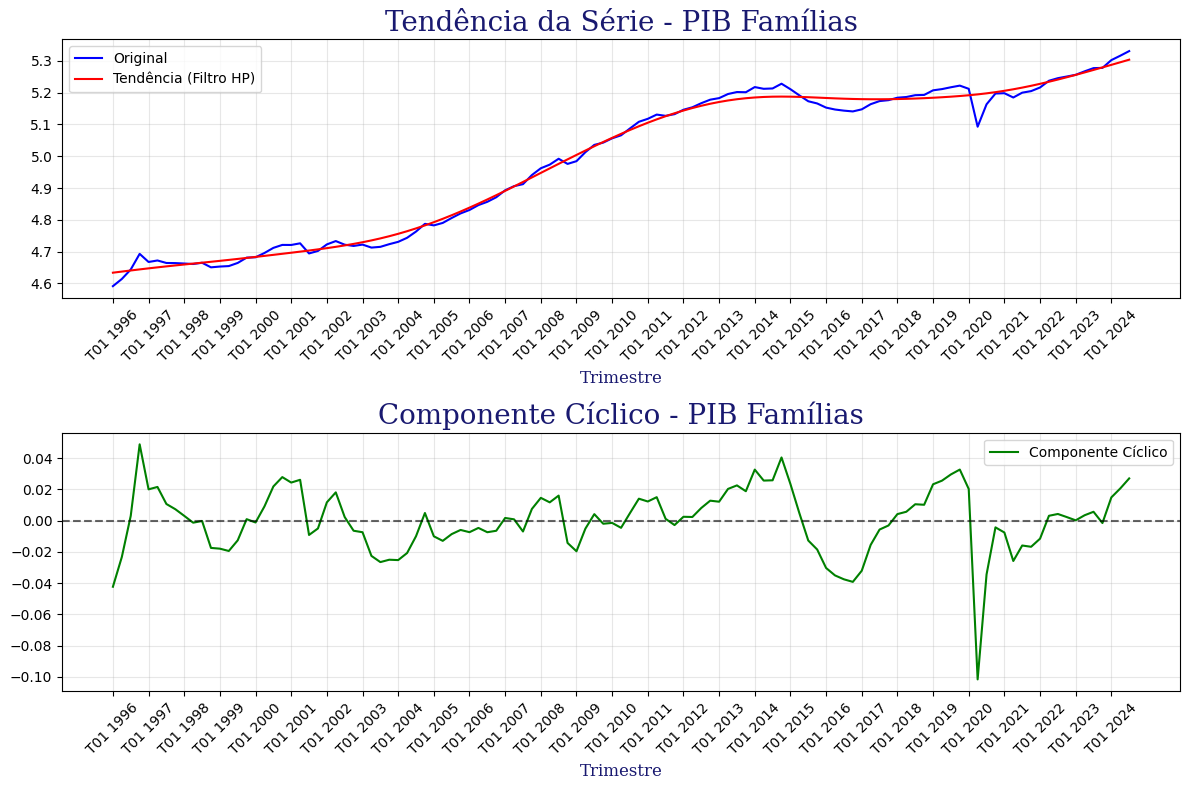

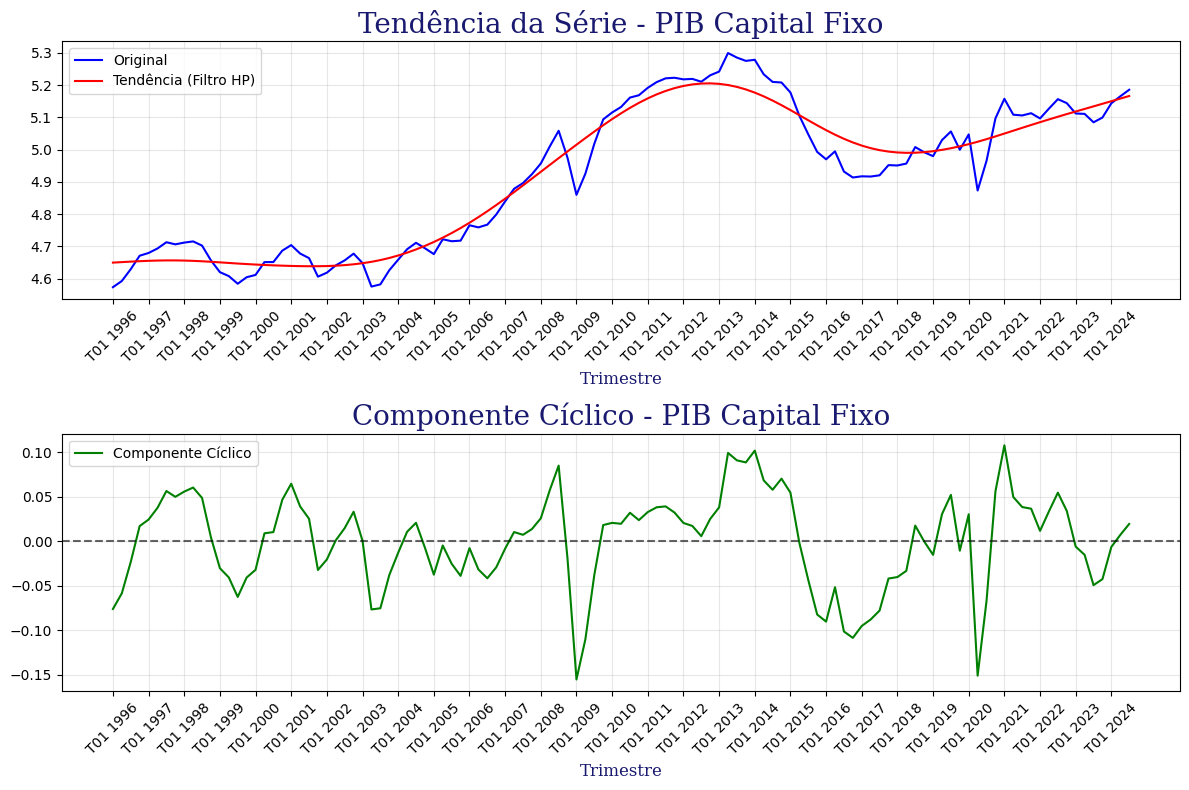

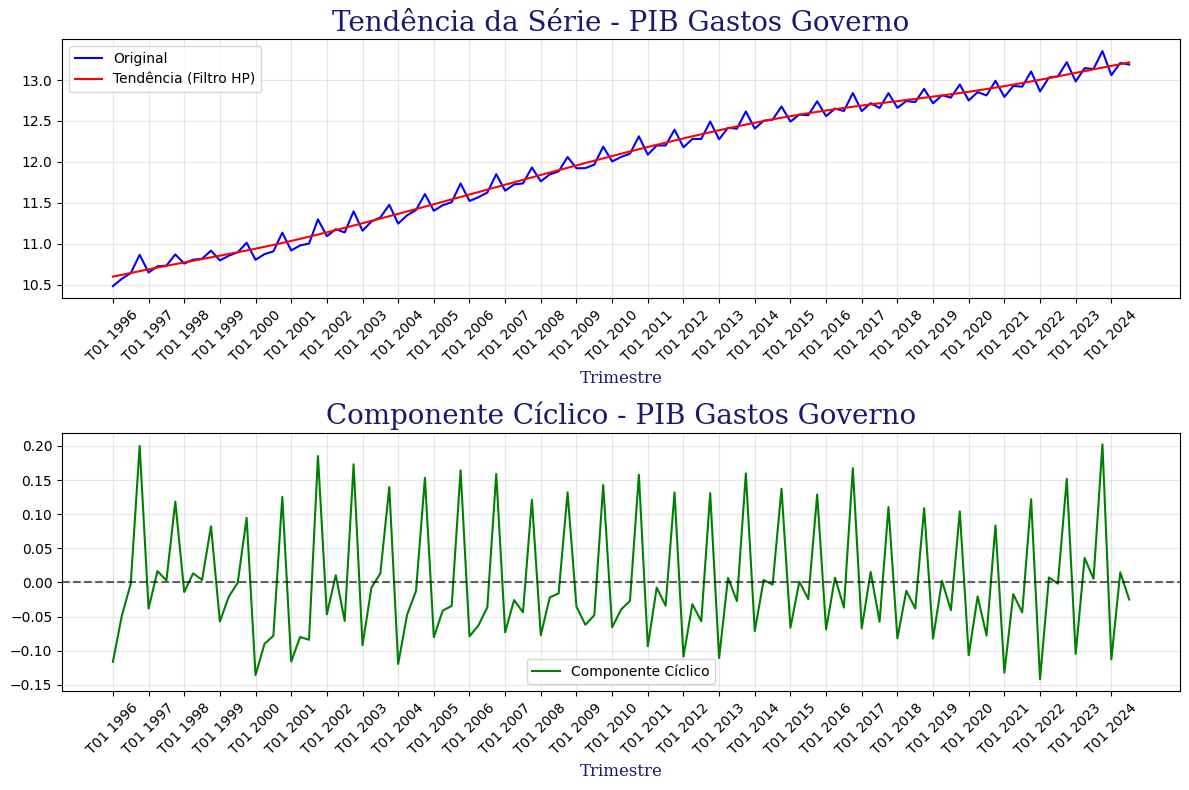

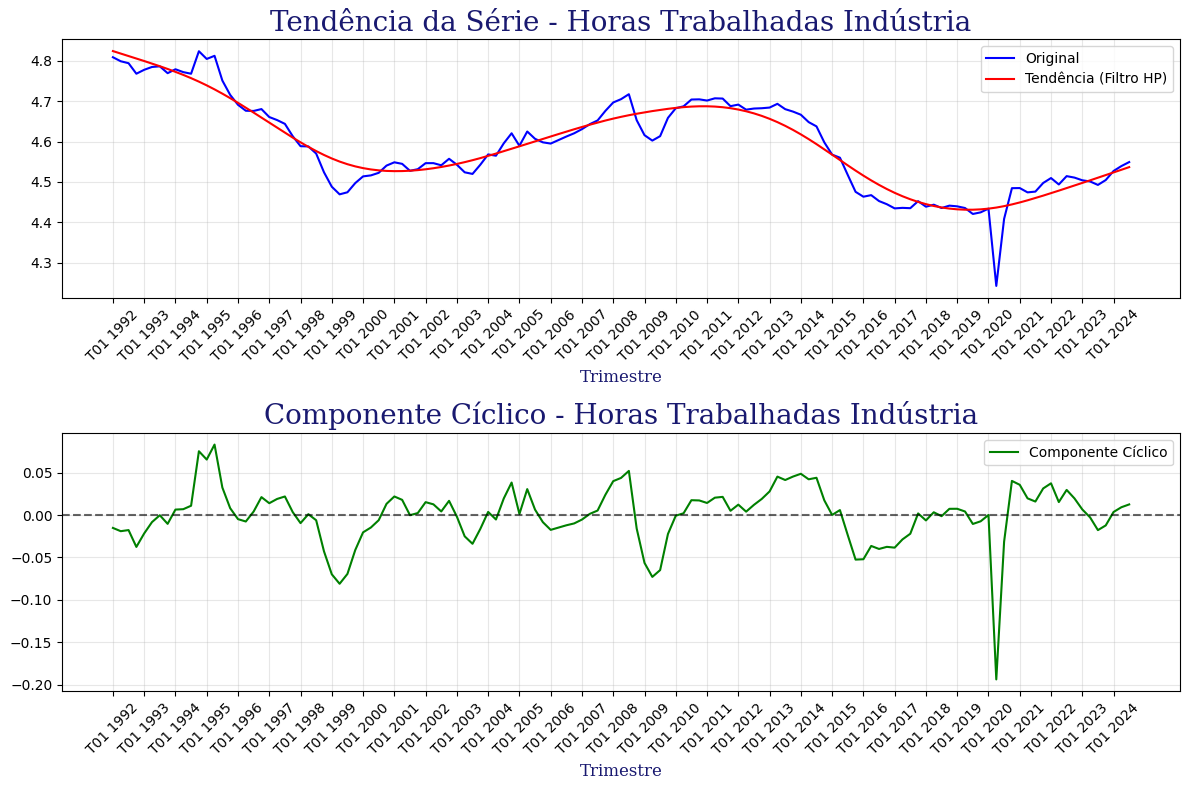

In [112]:
# Plotar para cada série
graficos(df['Trimestre-Ano'], df['PIB_Mercado_log'], df['PIB_Mercado_tendencia'], df['PIB_Mercado_ciclo'], 'PIB Mercado')
graficos(df['Trimestre-Ano'], df['PIB_familias_log'], df['PIB_familias_tendencia'], df['PIB_familias_ciclo'], 'PIB Famílias')
graficos(df['Trimestre-Ano'], df['PIB_capital_fixo_log'], df['PIB_capital_fixo_tendencia'], df['PIB_capital_fixo_ciclo'], 'PIB Capital Fixo')
graficos(df['Trimestre-Ano'], df['PIB_gastos_gov_log'], df['PIB_gastos_gov_tendencia'], df['PIB_gastos_gov_ciclo'], 'PIB Gastos Governo')
graficos(media_trimestral['Trimestre-Ano'], media_trimestral['horas_trabalhadas_log'], media_trimestral['horas_trabalhadas_tendencia'], media_trimestral['horas_trabalhadas_ciclo'], 'Horas Trabalhadas Indústria')

In [79]:
def plot_ciclo(data, ciclo, titulo):
    plt.figure(figsize=(10, 6))
    plt.plot(data, ciclo, label='Componente Cíclico', color='green')
    plt.axhline(0, color='black', linestyle='--', alpha=0.7)
    plt.title(f'Componente Cíclico da Série: - {titulo}', fontdict={'family':'serif','color':'midnightblue','size':20})
    plt.xlabel('Trimestre', fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.xticks(range(0, len(data), 4), data[::4], rotation=45)
    plt.ylabel('Ciclo', fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.legend()
    plt.grid(True, linestyle='-', alpha=0.7)
    
    plt.show()

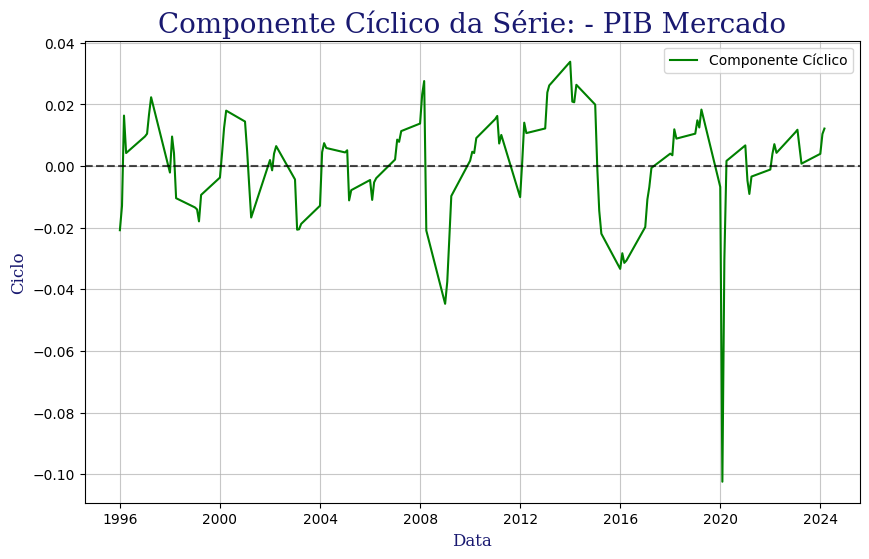

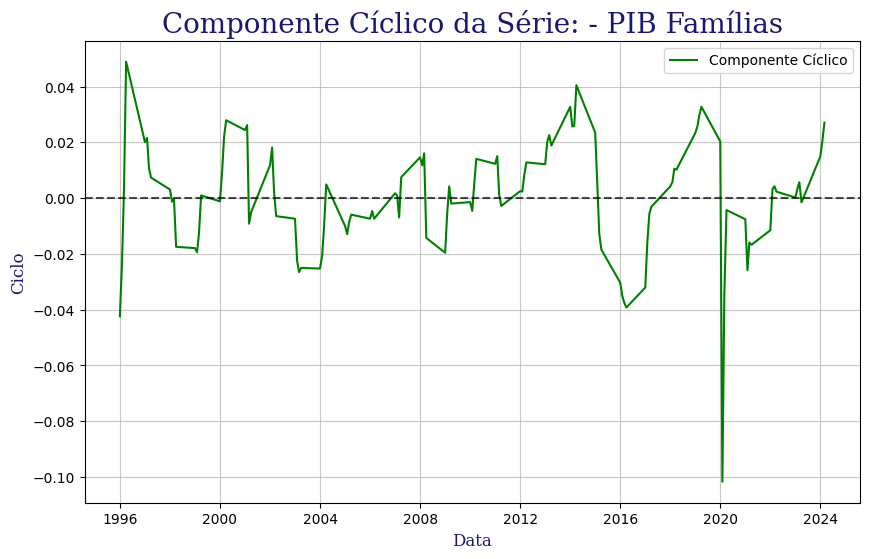

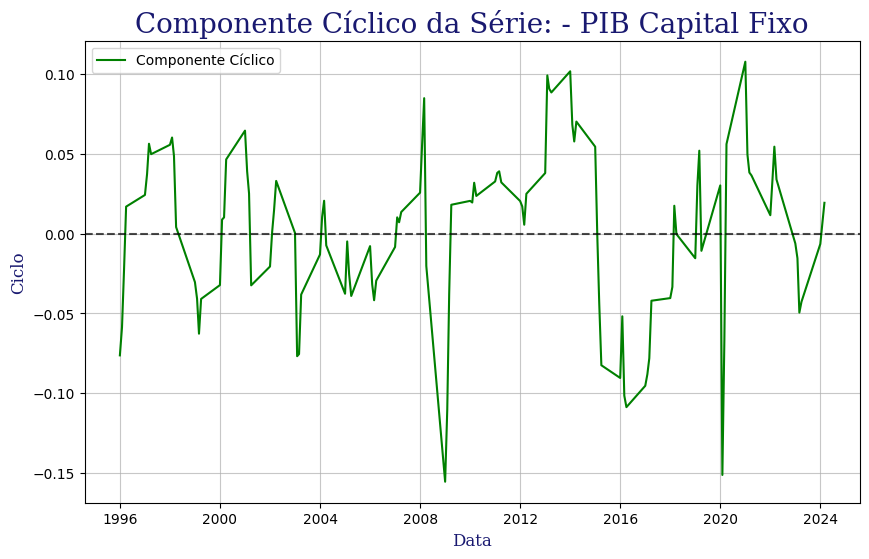

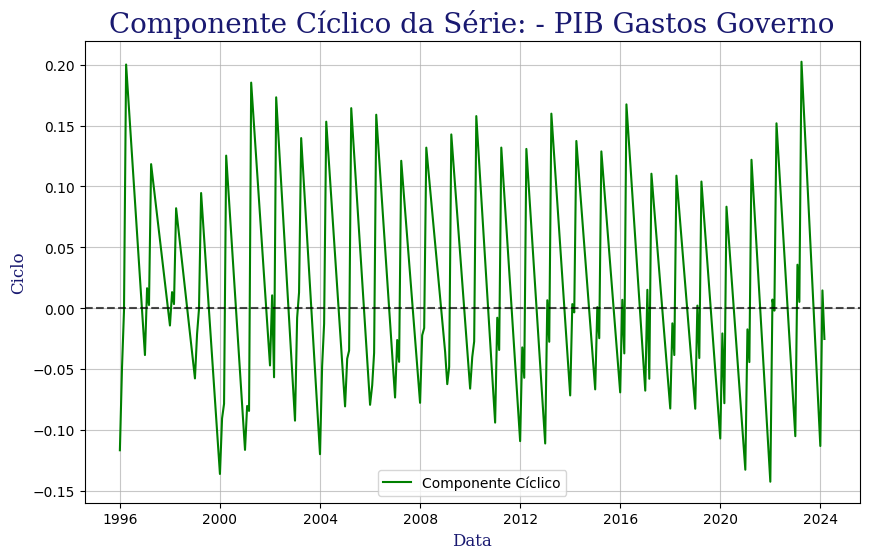

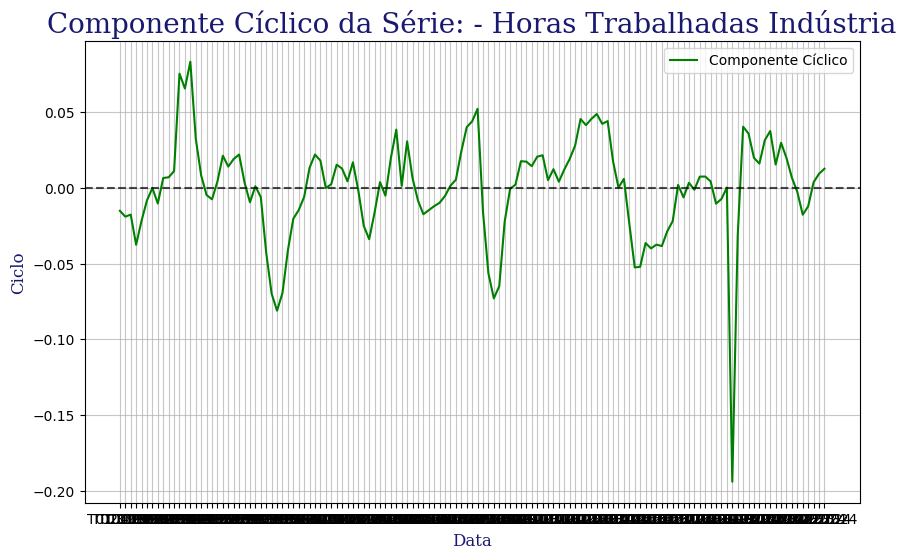

In [80]:
# Componente cíclico de cada série
plot_ciclo(df['Trimestre-Ano'], df['PIB_Mercado_ciclo'], 'PIB Mercado')
plot_ciclo(df['Trimestre-Ano'], df['PIB_familias_ciclo'], 'PIB Famílias')
plot_ciclo(df['Trimestre-Ano'], df['PIB_capital_fixo_ciclo'], 'PIB Capital Fixo')
plot_ciclo(df['Trimestre-Ano'],  df['PIB_gastos_gov_ciclo'], 'PIB Gastos Governo')
plot_ciclo(media_trimestral['Trimestre-Ano'], media_trimestral['horas_trabalhadas_ciclo'], 'Horas Trabalhadas Indústria')

## Identifique episódios históricos associando-os aos resultados encontrados.

iii. Agora faça um gráfico de dispersão para cada componente cíclico da série junto com o componente cíclico do PIB. O que você pode dizer sobre a prociclicalidade das séries com relação ao PIB?

In [96]:
media_trimestral = media_trimestral.rename(columns={'Data': 'Trimestre-Ano'})  # Ajustar o nome da coluna
df = df.merge(
    media_trimestral[['Trimestre-Ano', 'horas_trabalhadas_ciclo']], 
    on='Trimestre-Ano', 
    how='inner'
)

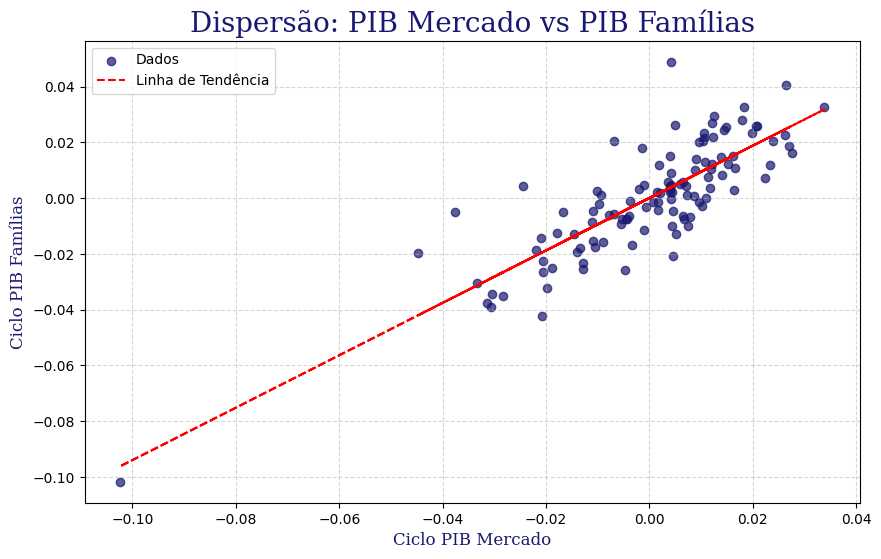

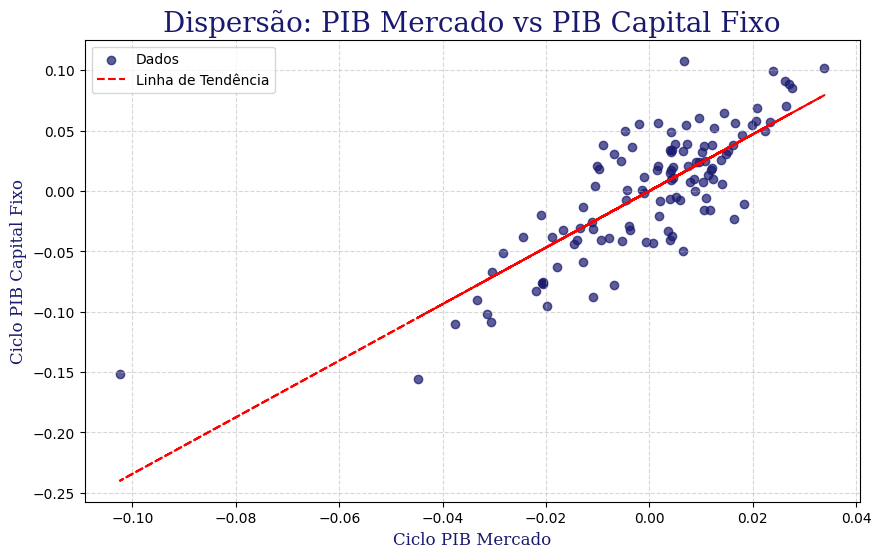

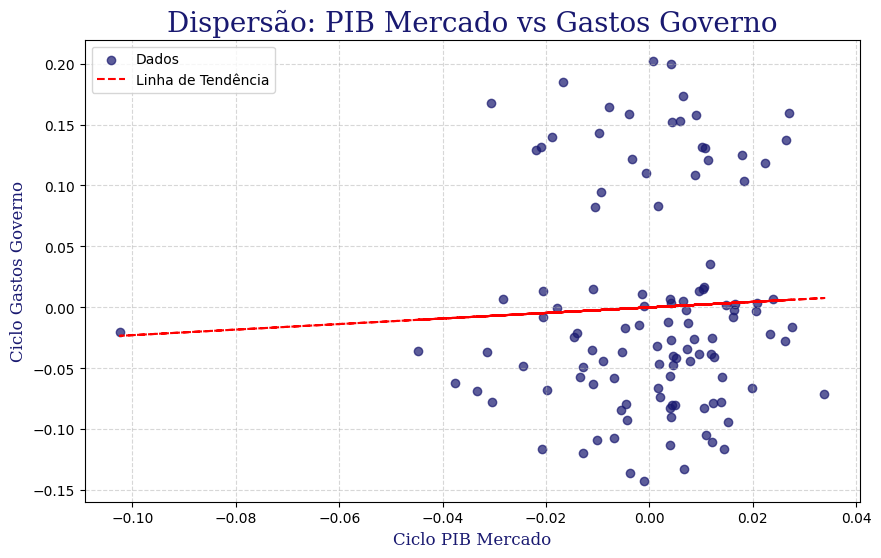

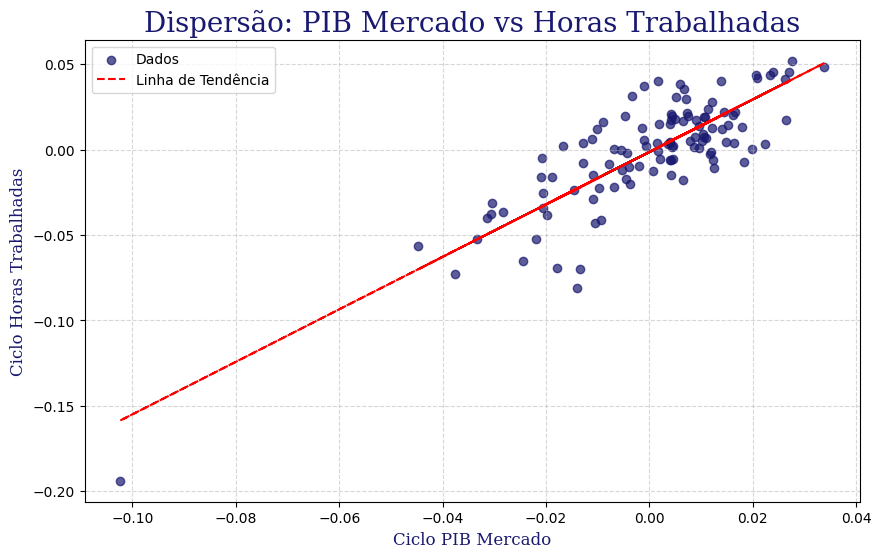

In [97]:
def plot_dispersao(x, y, titulo_x, titulo_y, titulo_grafico):
    # reta de regressão
    coef = np.polyfit(x, y, 1)  # polinômio de grau 1
    linha_tendencia = np.poly1d(coef)

    # Gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='midnightblue', alpha=0.7, label='Dados')
    plt.plot(x, linha_tendencia(x), color='red', linestyle='--', label='Linha de Tendência')
    plt.title(titulo_grafico, fontdict={'family':'serif','color':'midnightblue','size':20})
    plt.xlabel(titulo_x, fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.ylabel(titulo_y, fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Aplicando a função de dispersão para cada série
plot_dispersao(df['PIB_Mercado_ciclo'], df['PIB_familias_ciclo'], 
                 'Ciclo PIB Mercado', 'Ciclo PIB Famílias', 'Dispersão: PIB Mercado vs PIB Famílias')

plot_dispersao(df['PIB_Mercado_ciclo'], df['PIB_capital_fixo_ciclo'], 
                 'Ciclo PIB Mercado', 'Ciclo PIB Capital Fixo', 'Dispersão: PIB Mercado vs PIB Capital Fixo')

plot_dispersao(df['PIB_Mercado_ciclo'], df['PIB_gastos_gov_ciclo'], 
                 'Ciclo PIB Mercado', 'Ciclo Gastos Governo', 'Dispersão: PIB Mercado vs Gastos Governo')

plot_dispersao(df['PIB_Mercado_ciclo'], df['horas_trabalhadas_ciclo'], 
               'Ciclo PIB Mercado', 'Ciclo Horas Trabalhadas', 'Dispersão: PIB Mercado vs Horas Trabalhadas')

### Avaliar se as séries são pro-cíclicas (positivamente relacionadas ao PIB) ou contracíclicas (negativamente relacionadas ao PIB).

iv Agora faça uma tabela para os componentes cíclicos das séries, como vista em sala de
aula, para isso calcule as seguintes estatísticas:
- (i) correlação com a parte cíclica do
PIB
- (ii) desvio padrão da parte cíclica das séries (o desvio padrão é uma medida de volatilidade)
- (iii) desvio padrão da série relativo ao PIB.

- O que você pode dizer sobre os resultados?
- Quais variáveis são procíclicas e quais são contracíclicas?
- Quais variáveis são mais volatéis que o PIB?
- Como você explicaria os resultados para a volatilidade do consumo e do investimento em relação à volatilidade do PIB?


In [ ]:
# Criar um DataFrame para armazenar os resultados
resultados = pd.DataFrame(index=['PIB Famílias', 'PIB Capital Fixo', 'Gastos Governo', 'Horas Trabalhadas'],
                          columns=['Correlação com PIB', 'Desvio Padrão', 'Desvio Relativo ao PIB'])

# Calcular estatísticas
resultados.loc['PIB Famílias', 'Correlação com PIB'] = df['PIB_Mercado_ciclo'].corr(df['PIB_familias_ciclo'])
resultados.loc['PIB Famílias', 'Desvio Padrão'] = df['PIB_familias_ciclo'].std()
resultados.loc['PIB Famílias', 'Desvio Relativo ao PIB'] = resultados.loc['PIB Famílias', 'Desvio Padrão'] / df['PIB_Mercado_ciclo'].std()

resultados.loc['PIB Capital Fixo', 'Correlação com PIB'] = df['PIB_Mercado_ciclo'].corr(df['PIB_capital_fixo_ciclo'])
resultados.loc['PIB Capital Fixo', 'Desvio Padrão'] = df['PIB_capital_fixo_ciclo'].std()
resultados.loc['PIB Capital Fixo', 'Desvio Relativo ao PIB'] = resultados.loc['PIB Capital Fixo', 'Desvio Padrão'] / df['PIB_Mercado_ciclo'].std()

resultados.loc['Gastos Governo', 'Correlação com PIB'] = df['PIB_Mercado_ciclo'].corr(df['PIB_gastos_gov_ciclo'])
resultados.loc['Gastos Governo', 'Desvio Padrão'] = df['PIB_gastos_gov_ciclo'].std()
resultados.loc['Gastos Governo', 'Desvio Relativo ao PIB'] = resultados.loc['Gastos Governo', 'Desvio Padrão'] / df['PIB_Mercado_ciclo'].std()

resultados.loc['Horas Trabalhadas', 'Correlação com PIB'] = df['PIB_Mercado_ciclo'].corr(media_trimestral['horas_trabalhadas_ciclo'])
resultados.loc['Horas Trabalhadas', 'Desvio Padrão'] = media_trimestral['horas_trabalhadas_ciclo'].std()
resultados.loc['Horas Trabalhadas', 'Desvio Relativo ao PIB'] = resultados.loc['Horas Trabalhadas', 'Desvio Padrão'] / df['PIB_Mercado_ciclo'].std()


print("Tabela de Estatísticas dos Componentes Cíclicos:")
display(resultados)

print("\nInterpretação:")
print("1. Variáveis com correlação positiva são pró-cíclicas, enquanto as com correlação negativa são contracíclicas.")
print("2. O desvio padrão relativo indica quais variáveis são mais voláteis que o PIB.")
print("3. Comparar os valores para consumo, investimento e horas trabalhadas.")


Tabela de Estatísticas dos Componentes Cíclicos:


,Correlação com PIB,Desvio Padrão,Desvio Relativo ao PIB
PIB Famílias,0.832285,0.020351,1.128302
PIB Capital Fixo,0.805606,0.052439,2.907416
Gastos Governo,0.046395,0.088493,4.906332
Horas Trabalhadas,-0.075801,0.033607,1.863304



Interpretação:
1. Variáveis com correlação positiva são pró-cíclicas, enquanto as com correlação negativa são contracíclicas.
2. O desvio padrão relativo indica quais variáveis são mais voláteis que o PIB.
3. Compare os valores para consumo, investimento e horas trabalhadas.
